<a href="https://colab.research.google.com/github/alcome1614/proj_num/blob/main/16_01_2024_prof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library imports
import numpy as np
import matplotlib.pyplot as plt


<h1>Euler's Method</h1>
<p>$$\frac{dx}{dt} = \lim_{h\rightarrow0}\frac{x(t+h)-x(t)}{h}$$</p>
<p>This is the definition of derivative. In Euler's Method, we will simply make this process discrete. Consider the differential equation:
    $$\frac{dx}{dt} = f(x(t))$$
Then numerically we can have,
    $$ x(t+h) = x(t) + h f(x(t))$$
</p>




# Harmonic Oscillator

$$ F(x,t) = -kx $$

Using Newton's 2nd law we have:

$$ a(x,t) = \dfrac{d^2x}{dt^2} = \dfrac{1}{m} F(x,t) = - \dfrac{k}{m} x $$

We introduce a new variable: the speed $v= \dfrac{dx}{dt}$

$$
\begin{eqnarray}
  \dfrac{dx}{dt} & = & v(t) \\
  \dfrac{dv}{dt} & = & a(t) = - \dfrac{k}{m} x(t)
\end{eqnarray}
$$

<p>Then we will have two equations:
    $$x(t+h) = x(t) + hv(t)$$
    $$v(t+h) = v(t) + h a(t) = v(t) - hkx(t)$$
</p>


The energy should be a constant of the movement since the restoring force is conservative.

$$E(t) = E_{\text{potential}}(t)  + E_{\text{kinetic}}(t) = \dfrac{1}{2} m v(t)^2 + \dfrac{1}{2} k x(t)^2 = E_0$$

Checking if a conserved quantity of the movement is a good way to check how good the integration scheme.

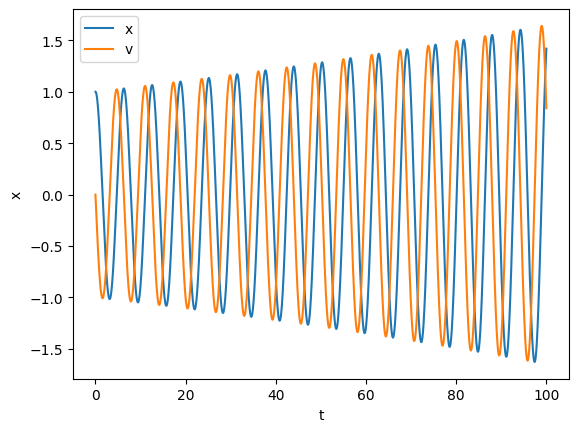

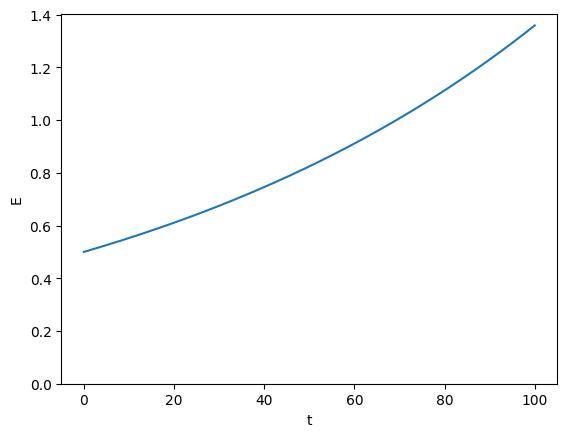

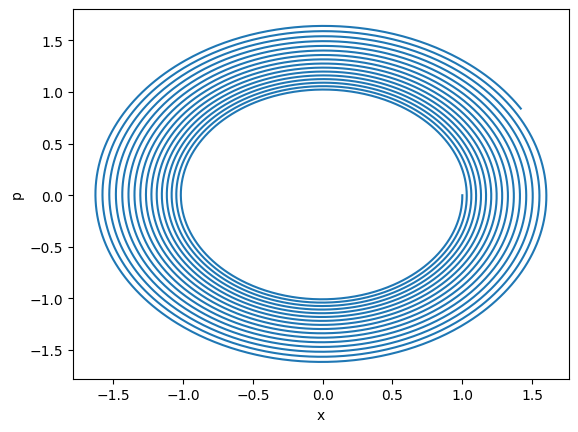

In [ ]:
#Model parameters
k = 1
m = 1

#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+1)
x = np.zeros(N_steps+1)
v = np.zeros(N_steps+1)
E = np.zeros(N_steps+1)

#Initial conditions
x[0] = 1
v[0] = 0
E[0] = 0.5*v[0]**2 + 0.5*x[0]**2

#Integration steps
for i_t in range(1,N_steps+1):
  t[i_t] = t[i_t-1] + dt
  x[i_t] = x[i_t-1] + dt*v[i_t-1]
  v[i_t] = v[i_t-1] - dt* k/m*x[i_t-1]
  E[i_t] = 0.5*v[i_t]**2 + 0.5*x[i_t]**2

#Plotting
plt.plot(t,x, label="x")
plt.plot(t,v, label="v")
plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t,E)
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0)
plt.show()

plt.plot(x,m*v)
plt.xlabel("x")
plt.ylabel("p")
plt.show()

## What happens to the energy?

## What happens to the trajectory in the phase space?

# Verlet Method

$$x(t+s) = 2x(t) - x(t-s) + s^2 a(t)$$

$$x(t) = 2x(t-s) - x(t-2s) + s^2 a(t-s)$$

In order to compute the velocity we use:

$$ v(t) = \dfrac{x(t+s)-x(t-s)}{2s}$$

Notice that we need a point in the timestep $t+s$ to compute the velocity at $t$ ($v(t)$).

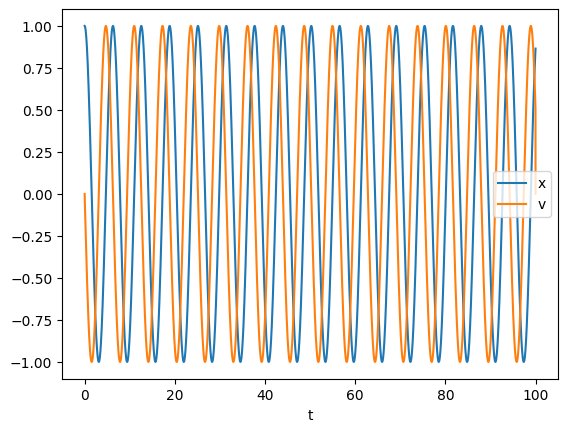

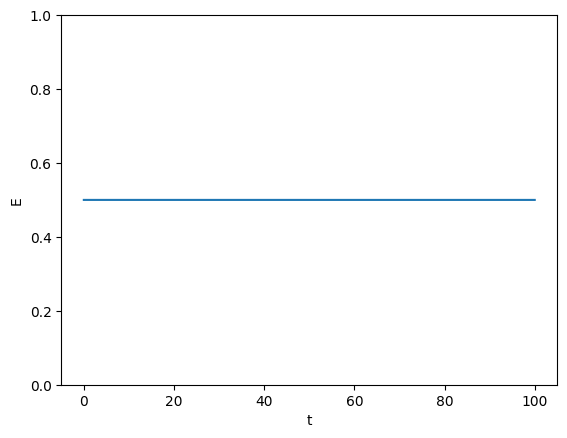

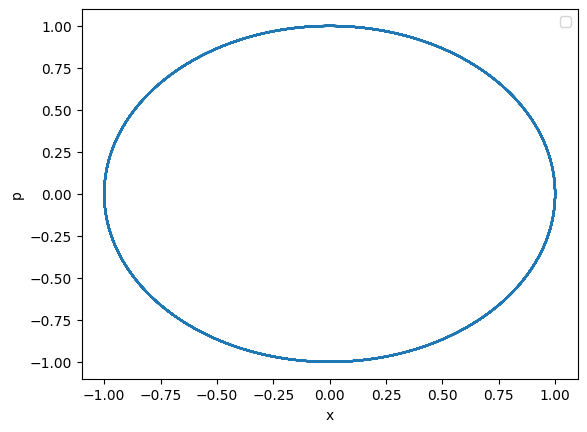

In [ ]:
#Model parameters
k = 1
m = 1

#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+2)
x = np.zeros(N_steps+2)
v = np.zeros(N_steps+2)
a = np.zeros(N_steps+2)
E = np.zeros(N_steps+2)

#Initial conditions
x[1] = 1
v[1] = 0
x[0] = x[1] - v[1]*dt
E[1] = 0.5*v[1]**2 + 0.5*x[1]**2

#Integration steps
for i_t in range(2,N_steps+2):
  a[i_t-1] = - k/m* x[i_t-1]
  t[i_t] = t[i_t-1] + dt
  x[i_t] = 2*x[i_t-1] - x[i_t -2] + dt**2 * a[i_t-1]

for i_t in range(2,N_steps+1):
  v[i_t] = (x[i_t+1] - x[i_t-1])/(2*dt)
  E[i_t] = 0.5*v[i_t]**2 + 0.5*x[i_t]**2

#Plotting
plt.plot(t,x, label="x")
plt.plot(t,v, label="v")
# plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=1)
plt.show()

plt.plot(x[1:-1],m*v[1:-1])
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()

## What happens to the energy? Compare it to the Euler case results.

## What happens to the trajectory in the phase space? Compare it to the Euler case results.